<h2 style = 'background-color:teal;padding:10px;color:white;border-radius:10px;text-align:center;margin-left:150px;margin-right:170px;'> CPI Forecast </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('seaborn-darkgrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(15, 5),
    titlesize=20,
    titleweight='bold'
)
%config InlineBackend.figure_format = 'retina'

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:600px'> Loading, cleaning and undestanding CPI data </h3>

In [5]:
# loading cpi data
cpi_df = pd.read_excel('cpi_malawi.xls')

In [6]:
# transforming data
cpi_data = cpi_df.iloc[10::,::]
cpi_data.columns = ['Year','CPI']
cpi_data.reset_index(inplace = True,drop = True)

In [7]:
cpi_data.head()

,Year,CPI
0,1979-01-01 00:00:00,0.447904
1,1980-01-01 00:00:00,0.508253
2,1981-01-01 00:00:00,0.553987
3,1982-01-01 00:00:00,0.623294
4,1983-01-01 00:00:00,0.739278


In [8]:
cpi_data.tail()

,Year,CPI
34,2013-01-01 00:00:00,183.505
35,2014-01-01 00:00:00,227.75
36,2015-01-01 00:00:00,284.393
37,2016-01-01 00:00:00,341.168
38,2017-01-01 00:00:00,365.313


In [9]:
# making values numeric
cpi_data.CPI = np.array([float(i) for i in cpi_data.CPI])

In [10]:
# info on data
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    39 non-null     object 
 1   CPI     39 non-null     float64
dtypes: float64(1), object(1)
memory usage: 752.0+ bytes


In [11]:
# data summary
cpi_data.describe()

,CPI
count,39.000000
mean,65.248366
std,95.421081
min,0.447904
25%,1.782895
50%,21.560700
75%,86.413650
max,365.313000


In [12]:
cpi_data.head()

,Year,CPI
0,1979-01-01 00:00:00,0.447904
1,1980-01-01 00:00:00,0.508253
2,1981-01-01 00:00:00,0.553987
3,1982-01-01 00:00:00,0.623294
4,1983-01-01 00:00:00,0.739278


In [13]:
# converting year to datetime
cpi_data.Year = pd.to_datetime(cpi_data.Year)

In [14]:
# making year column index
cpi_data.index = cpi_data.Year

In [15]:
# dropping the year column
cpi_data.drop('Year',axis = 'columns',inplace = True)

In [16]:
cpi_data.head()

,CPI
Year,
1979-01-01,0.447904
1980-01-01,0.508253
1981-01-01,0.553987
1982-01-01,0.623294
1983-01-01,0.739278


In [17]:
cpi_data.to_csv('cpiData.csv')

In [18]:
ss = pd.read_csv('cpiData.csv')

In [19]:
ss

,Year,CPI
0,1979-01-01,0.447904
1,1980-01-01,0.508253
2,1981-01-01,0.553987
3,1982-01-01,0.623294
4,1983-01-01,0.739278
5,1984-01-01,0.827444
6,1985-01-01,0.918911
7,1986-01-01,1.046210
8,1987-01-01,1.417730
9,1988-01-01,1.791620


In [20]:
pd.to_datetime(ss.Year)

0    1979-01-01
1    1980-01-01
2    1981-01-01
3    1982-01-01
4    1983-01-01
5    1984-01-01
6    1985-01-01
7    1986-01-01
8    1987-01-01
9    1988-01-01
10   1989-01-01
11   1990-01-01
12   1991-01-01
13   1992-01-01
14   1993-01-01
15   1994-01-01
16   1995-01-01
17   1996-01-01
18   1997-01-01
19   1998-01-01
20   1999-01-01
21   2000-01-01
22   2001-01-01
23   2002-01-01
24   2003-01-01
25   2004-01-01
26   2005-01-01
27   2006-01-01
28   2007-01-01
29   2008-01-01
30   2009-01-01
31   2010-01-01
32   2011-01-01
33   2012-01-01
34   2013-01-01
35   2014-01-01
36   2015-01-01
37   2016-01-01
38   2017-01-01
Name: Year, dtype: datetime64[ns]

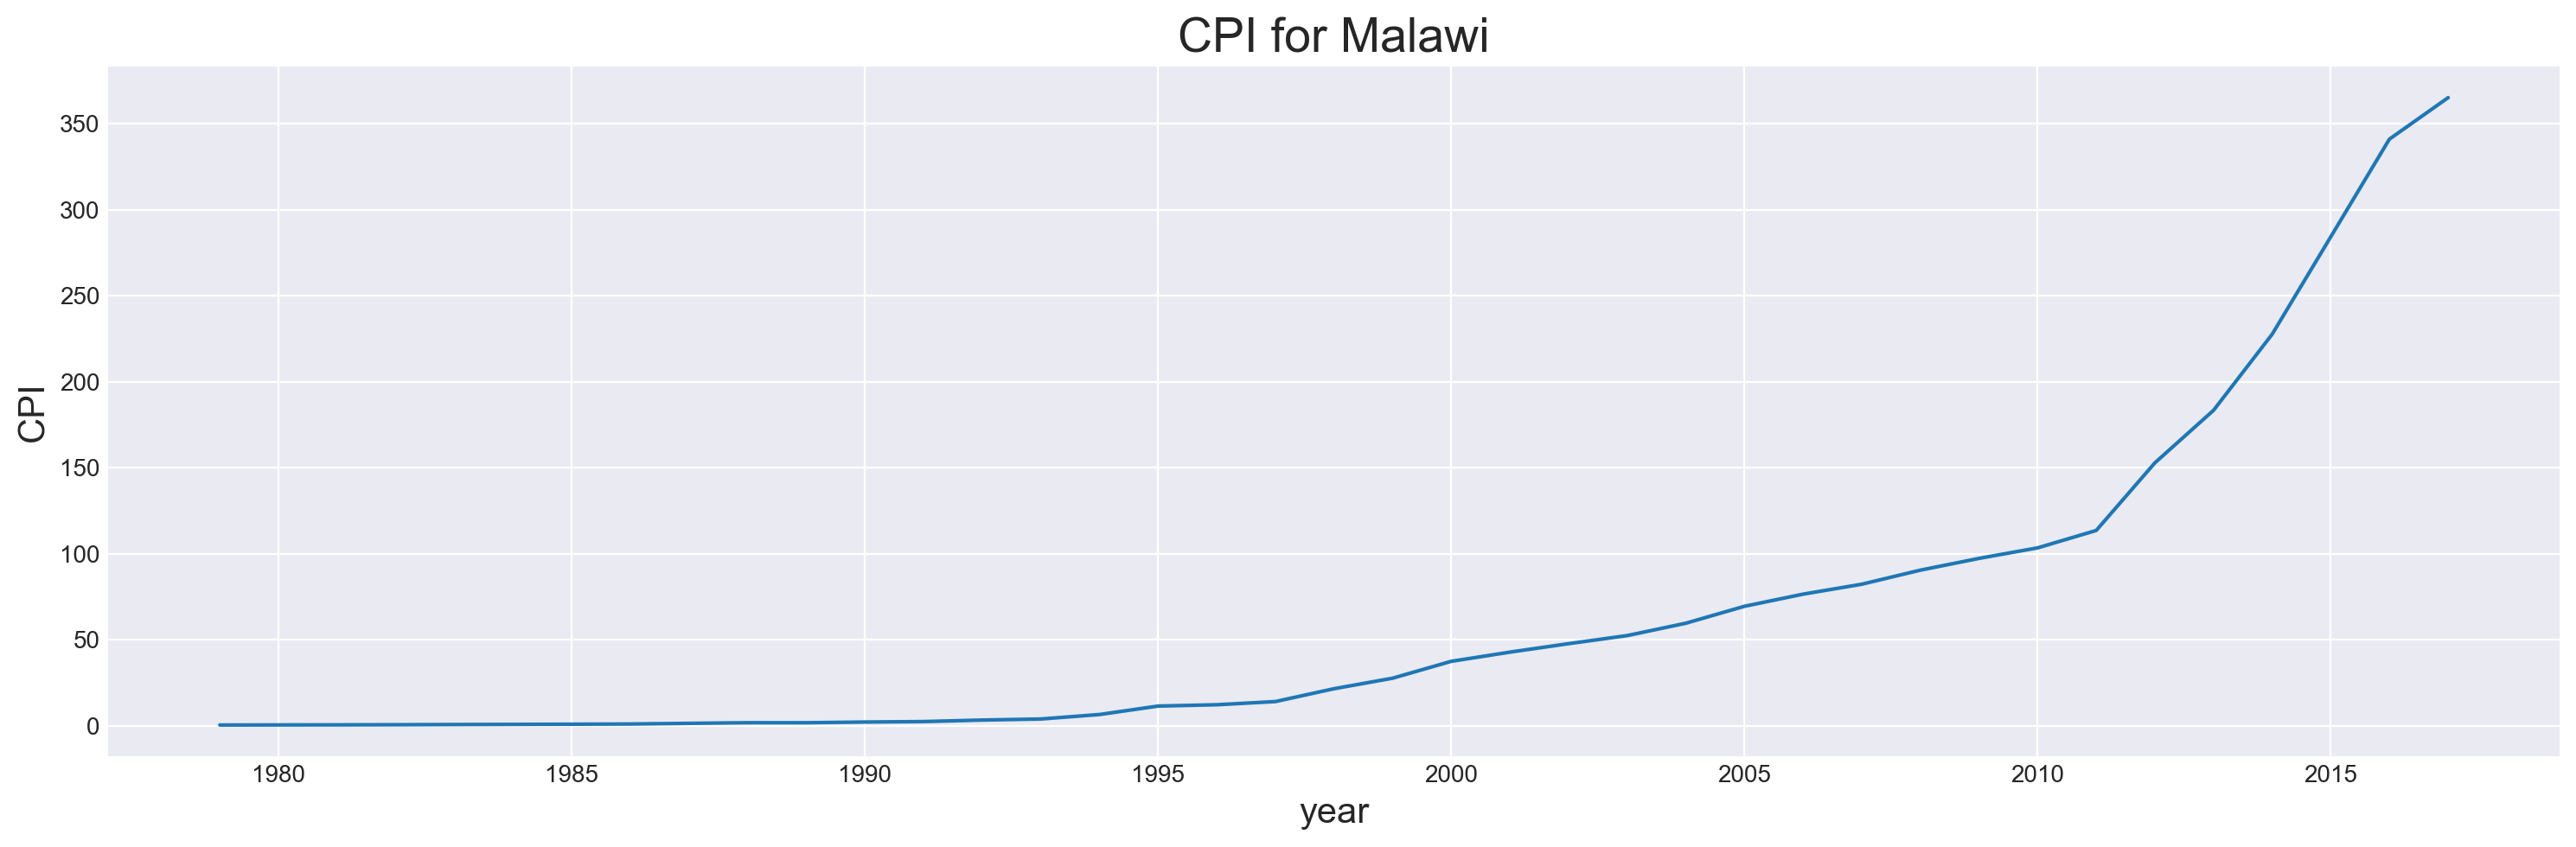

In [21]:
plt.plot(cpi_data)
plt.title('CPI for Malawi',size = 20)
plt.xlabel('year',size = 15)
plt.ylabel('CPI',size =15)
plt.show()

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Checking stationarity (A) </h3>

#### Null hypothesis : Time series is not stationary
#### Alt hypothesis  : Time series is stationary

In [22]:
result = adfuller(cpi_data.CPI) # applying augmented dicky fuller test

In [23]:
test_statistic,p_value,critical_values = result[0],result[1],result[4]

In [24]:
test_statistic

4.921770223979879

In [25]:
p_value

1.0

In [26]:
critical_values

{'1%': -3.6461350877925254,
 '5%': -2.954126991123355,
 '10%': -2.6159676124885216}

In [27]:
p_value < 0.05 # p-value is greater than significance value. Therefore we fail to reject the null hypothesis

False

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Making TS stationary </h3>

In [28]:
# log transformation
np.log(cpi_data.CPI)

Year
1979-01-01   -0.803176
1980-01-01   -0.676776
1981-01-01   -0.590614
1982-01-01   -0.472737
1983-01-01   -0.302081
1984-01-01   -0.189414
1985-01-01   -0.084566
1986-01-01    0.045174
1987-01-01    0.349057
1988-01-01    0.583120
1989-01-01    0.573333
1990-01-01    0.781968
1991-01-01    0.896928
1992-01-01    1.204940
1993-01-01    1.373609
1994-01-01    1.880213
1995-01-01    2.439543
1996-01-01    2.504579
1997-01-01    2.645664
1998-01-01    3.070872
1999-01-01    3.320548
2000-01-01    3.623965
2001-01-01    3.757496
2002-01-01    3.866174
2003-01-01    3.959881
2004-01-01    4.088233
2005-01-01    4.241374
2006-01-01    4.338038
2007-01-01    4.410664
2008-01-01    4.505385
2009-01-01    4.578445
2010-01-01    4.639359
2011-01-01    4.732736
2012-01-01    5.029706
2013-01-01    5.212242
2014-01-01    5.428249
2015-01-01    5.650357
2016-01-01    5.832375
2017-01-01    5.900755
Name: CPI, dtype: float64

In [29]:
# making data stationary through log transformation and differencing

cpi_data['Diff'] = np.log(cpi_data.CPI).diff()

In [30]:
cpi_data.head()

,CPI,Diff
Year,,
1979-01-01,0.447904,NaN
1980-01-01,0.508253,0.126400
1981-01-01,0.553987,0.086162
1982-01-01,0.623294,0.117877
1983-01-01,0.739278,0.170656


In [31]:
cpi_data.tail()

,CPI,Diff
Year,,
2013-01-01,183.505,0.182536
2014-01-01,227.750,0.216007
2015-01-01,284.393,0.222109
2016-01-01,341.168,0.182018
2017-01-01,365.313,0.068379


In [32]:
cpi_data

,CPI,Diff
Year,,
1979-01-01,0.447904,NaN
1980-01-01,0.508253,0.126400
1981-01-01,0.553987,0.086162
1982-01-01,0.623294,0.117877
1983-01-01,0.739278,0.170656
1984-01-01,0.827444,0.112667
1985-01-01,0.918911,0.104848
1986-01-01,1.046210,0.129740
1987-01-01,1.417730,0.303883


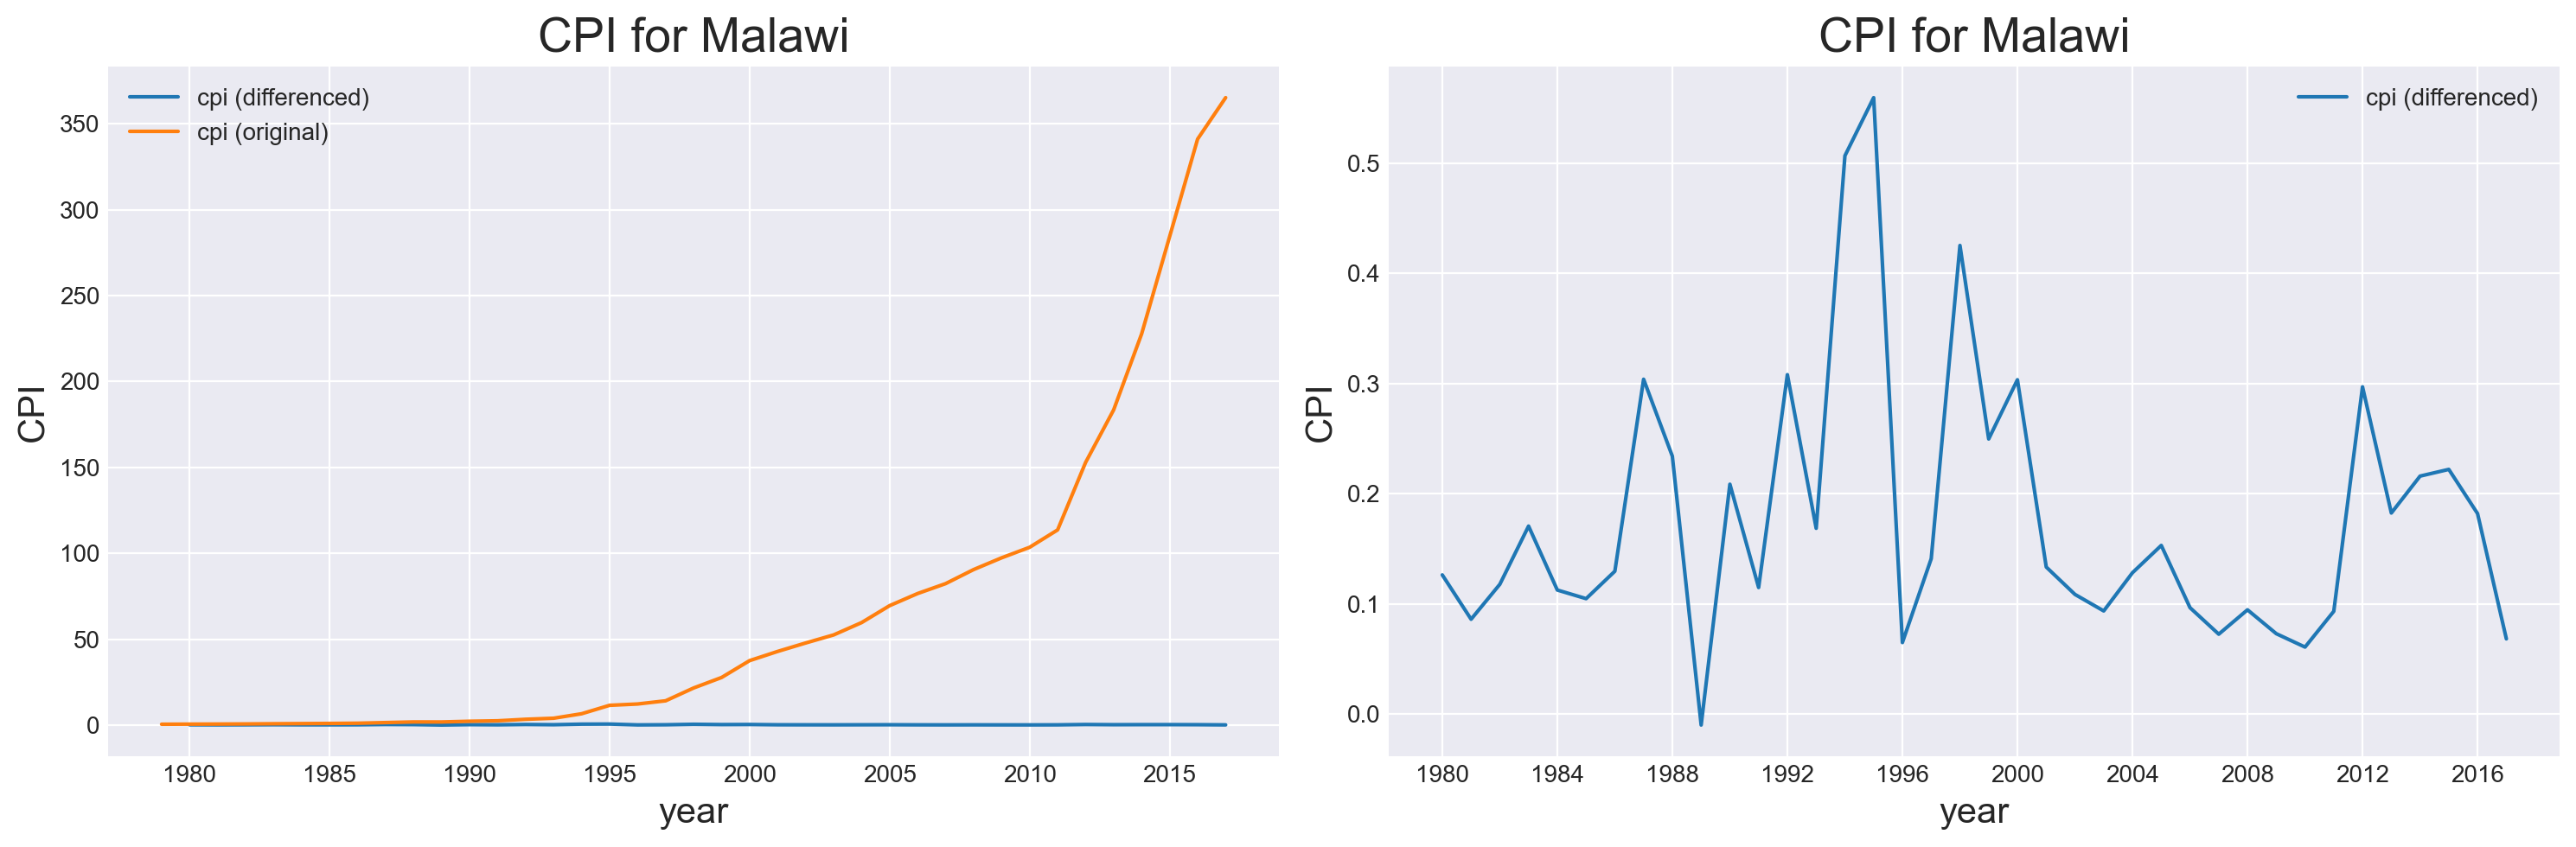

In [33]:
a,(ax,ax2) = plt.subplots(1,2)
ax.plot(cpi_data.Diff,label = 'cpi (differenced)')
ax.plot(cpi_data.CPI,label ='cpi (original)')
ax.set_title('CPI for Malawi',size = 20)
ax.set_xlabel('year',size = 15)
ax.set_ylabel('CPI',size =15)
ax.legend()
ax2.plot(cpi_data.Diff,label = 'cpi (differenced)')
ax2.set_title('CPI for Malawi',size = 20)
ax2.set_xlabel('year',size = 15)
ax2.set_ylabel('CPI',size =15)
ax2.legend()
plt.show()

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Checking stationarity (B) </h3>

#### Null hypothesis : Time series is not stationary
#### Alt hypothesis  : Time series is stationary

In [34]:
result2 = adfuller(cpi_data.Diff.dropna())

In [35]:
test_statistic2,p_value2,critical_values2 = result2[0],result2[1],result2[4]

In [36]:
test_statistic2

-4.460003663130478

In [37]:
p_value2

0.00023208478102797707

In [38]:
critical_values2

{'1%': -3.6209175221605827,
 '5%': -2.9435394610388332,
 '10%': -2.6104002410518627}

In [39]:
p_value2 < 0.05 # p-value is less than significance value. Therefore, we reject null hypothesis.

True

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:600px'> Plotting ACF and PACF to determine order of ARIMA</h3>

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

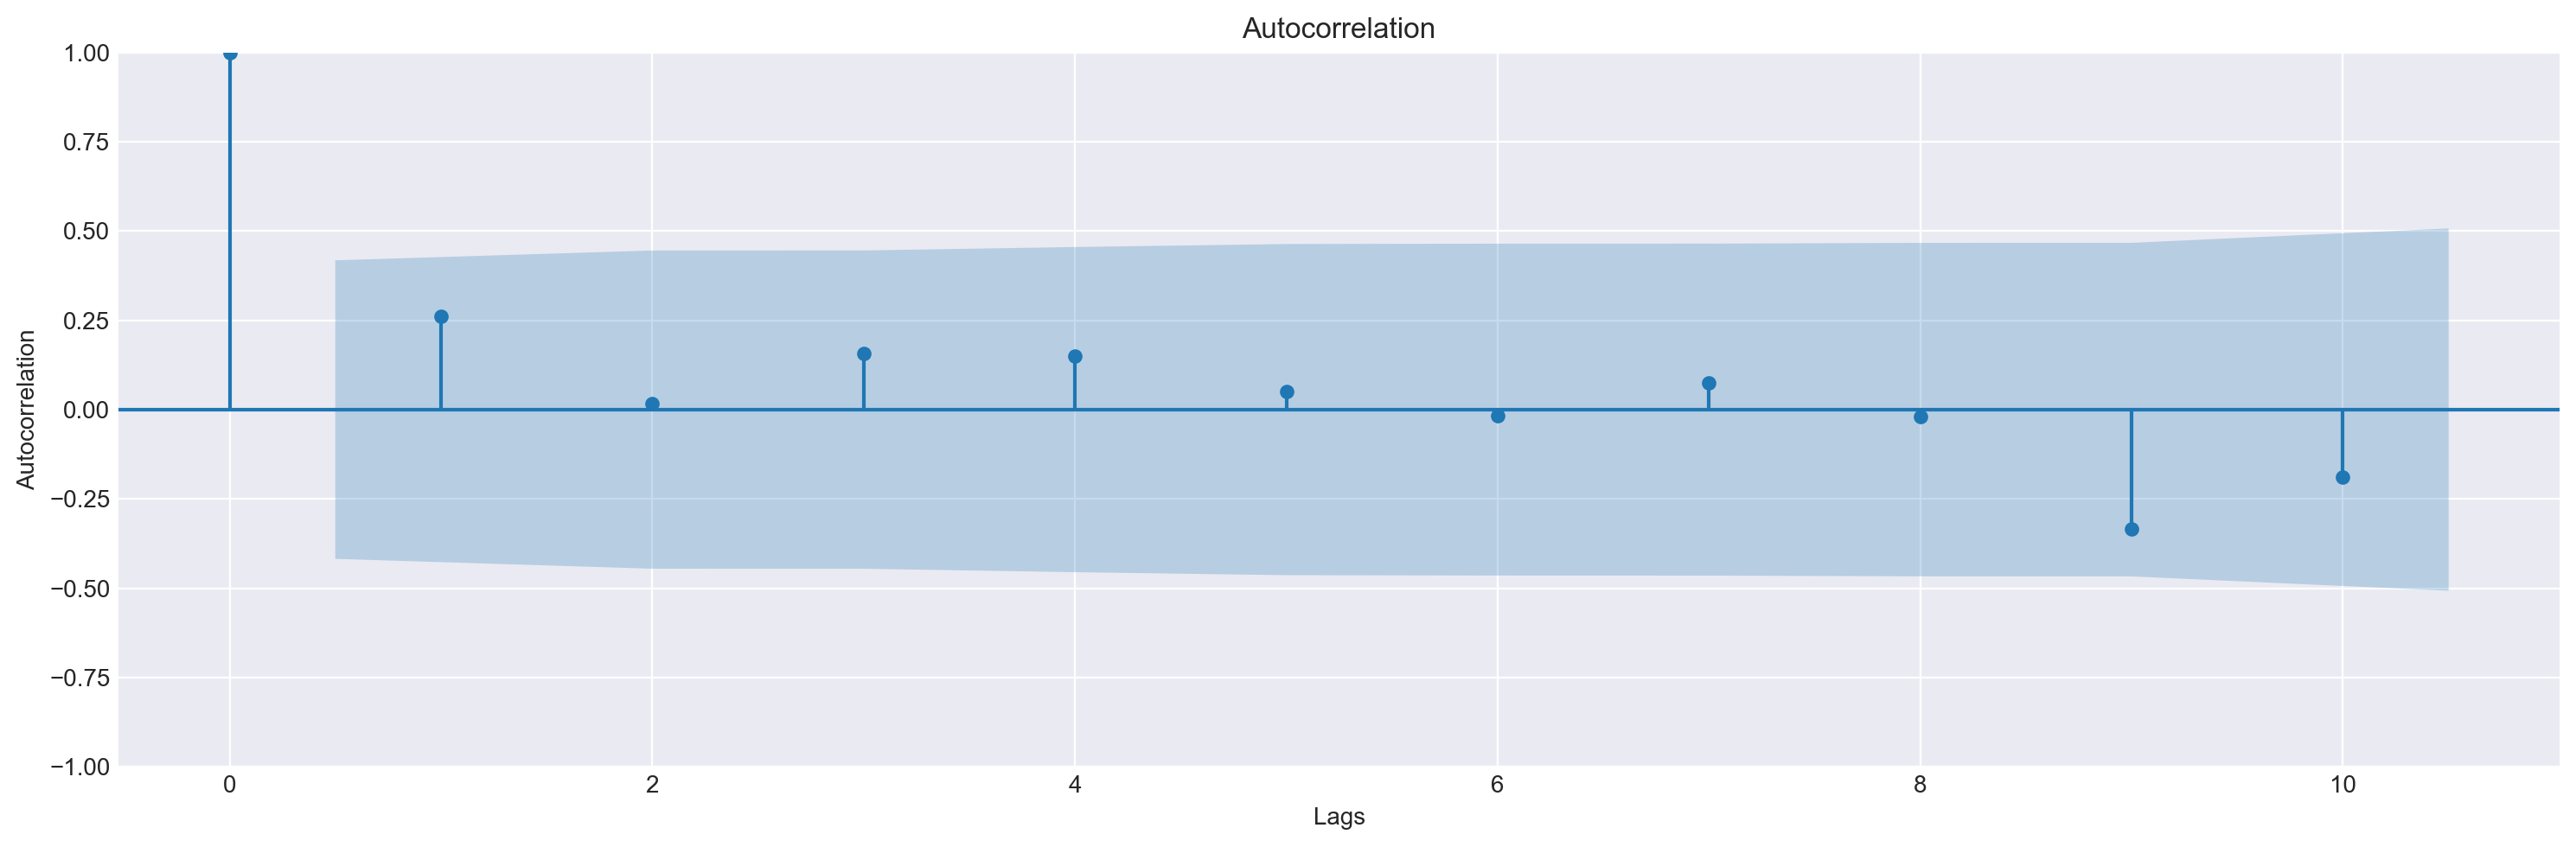

In [41]:
a2,ax2 = plt.subplots(1,1)
plot_acf(cpi_data.Diff.dropna(),alpha = 0.01,lags = 10,ax = ax2)
ax2.set_xlabel('Lags')
ax2.set_ylabel('Autocorrelation')
plt.show()

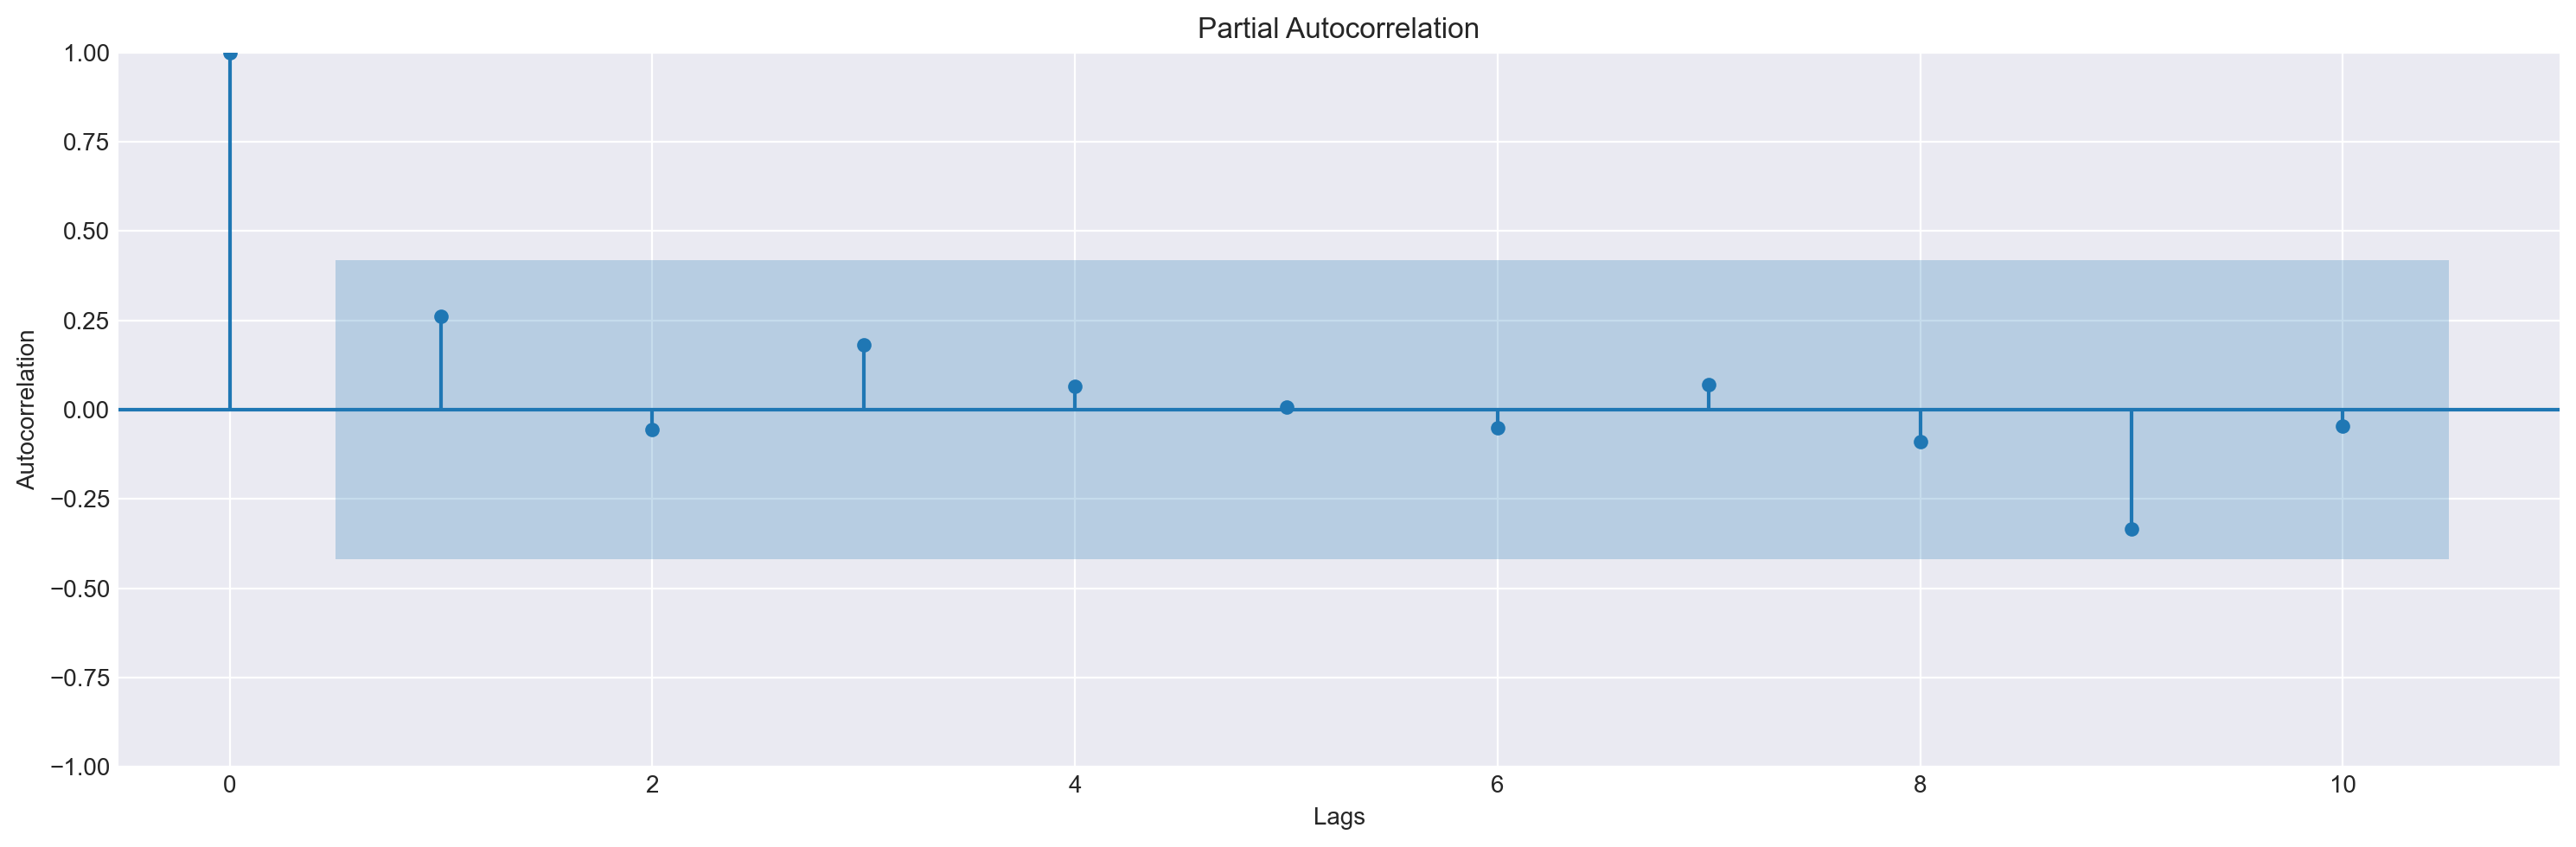

In [42]:
a2,ax3 = plt.subplots(1,1)
plot_pacf(cpi_data.Diff.dropna(),alpha = 0.01,lags = 10,method = 'ywm',ax = ax3)
ax3.set_xlabel('Lags')
ax3.set_ylabel('Autocorrelation')
plt.show()

#### recommending ar(1),ma(1),arma(1,1) and arma(0,4,6)

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Estimating the models </h3>

In [43]:
#Estimate the AR (1)
model_1 = sm.tsa.arima.ARIMA(cpi_data['Diff'].dropna(), order=(1, 0, 0))
resid_1 = model_1.fit()
print(resid_1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   38
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  27.713
Date:                Wed, 08 May 2024   AIC                            -49.426
Time:                        10:04:28   BIC                            -44.513
Sample:                    01-01-1980   HQIC                           -47.678
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1750      0.036      4.902      0.000       0.105       0.245
ar.L1          0.2613      0.114      2.298      0.022       0.038       0.484
sigma2         0.0136      0.003      4.346      0.0

In [44]:
#Estimate the MA (1)
model_01 = sm.tsa.arima.ARIMA(cpi_data['Diff'].dropna(), order=(0, 0, 1))
resid_01 = model_01.fit()
print(resid_01.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   38
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  27.893
Date:                Wed, 08 May 2024   AIC                            -49.787
Time:                        10:04:28   BIC                            -44.874
Sample:                    01-01-1980   HQIC                           -48.039
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1753      0.033      5.358      0.000       0.111       0.239
ma.L1          0.3044      0.109      2.803      0.005       0.092       0.517
sigma2         0.0135      0.003      4.211      0.0

In [45]:
#Estimate the ARMA (1,1)
model_11 = sm.tsa.arima.ARIMA(cpi_data['Diff'], order=(1, 0, 1))
resid_11 = model_11.fit()
print(resid_11.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   39
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  27.955
Date:                Wed, 08 May 2024   AIC                            -47.909
Time:                        10:04:29   BIC                            -41.255
Sample:                    01-01-1979   HQIC                           -45.522
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1756      0.034      5.111      0.000       0.108       0.243
ar.L1         -0.1955      0.434     -0.451      0.652      -1.046       0.655
ma.L1          0.4856      0.345      1.408      0.1

#### Conclusion - MA(1) has lowest AIC and BIC, therefore, it is being considered

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model diagnostics </h3>

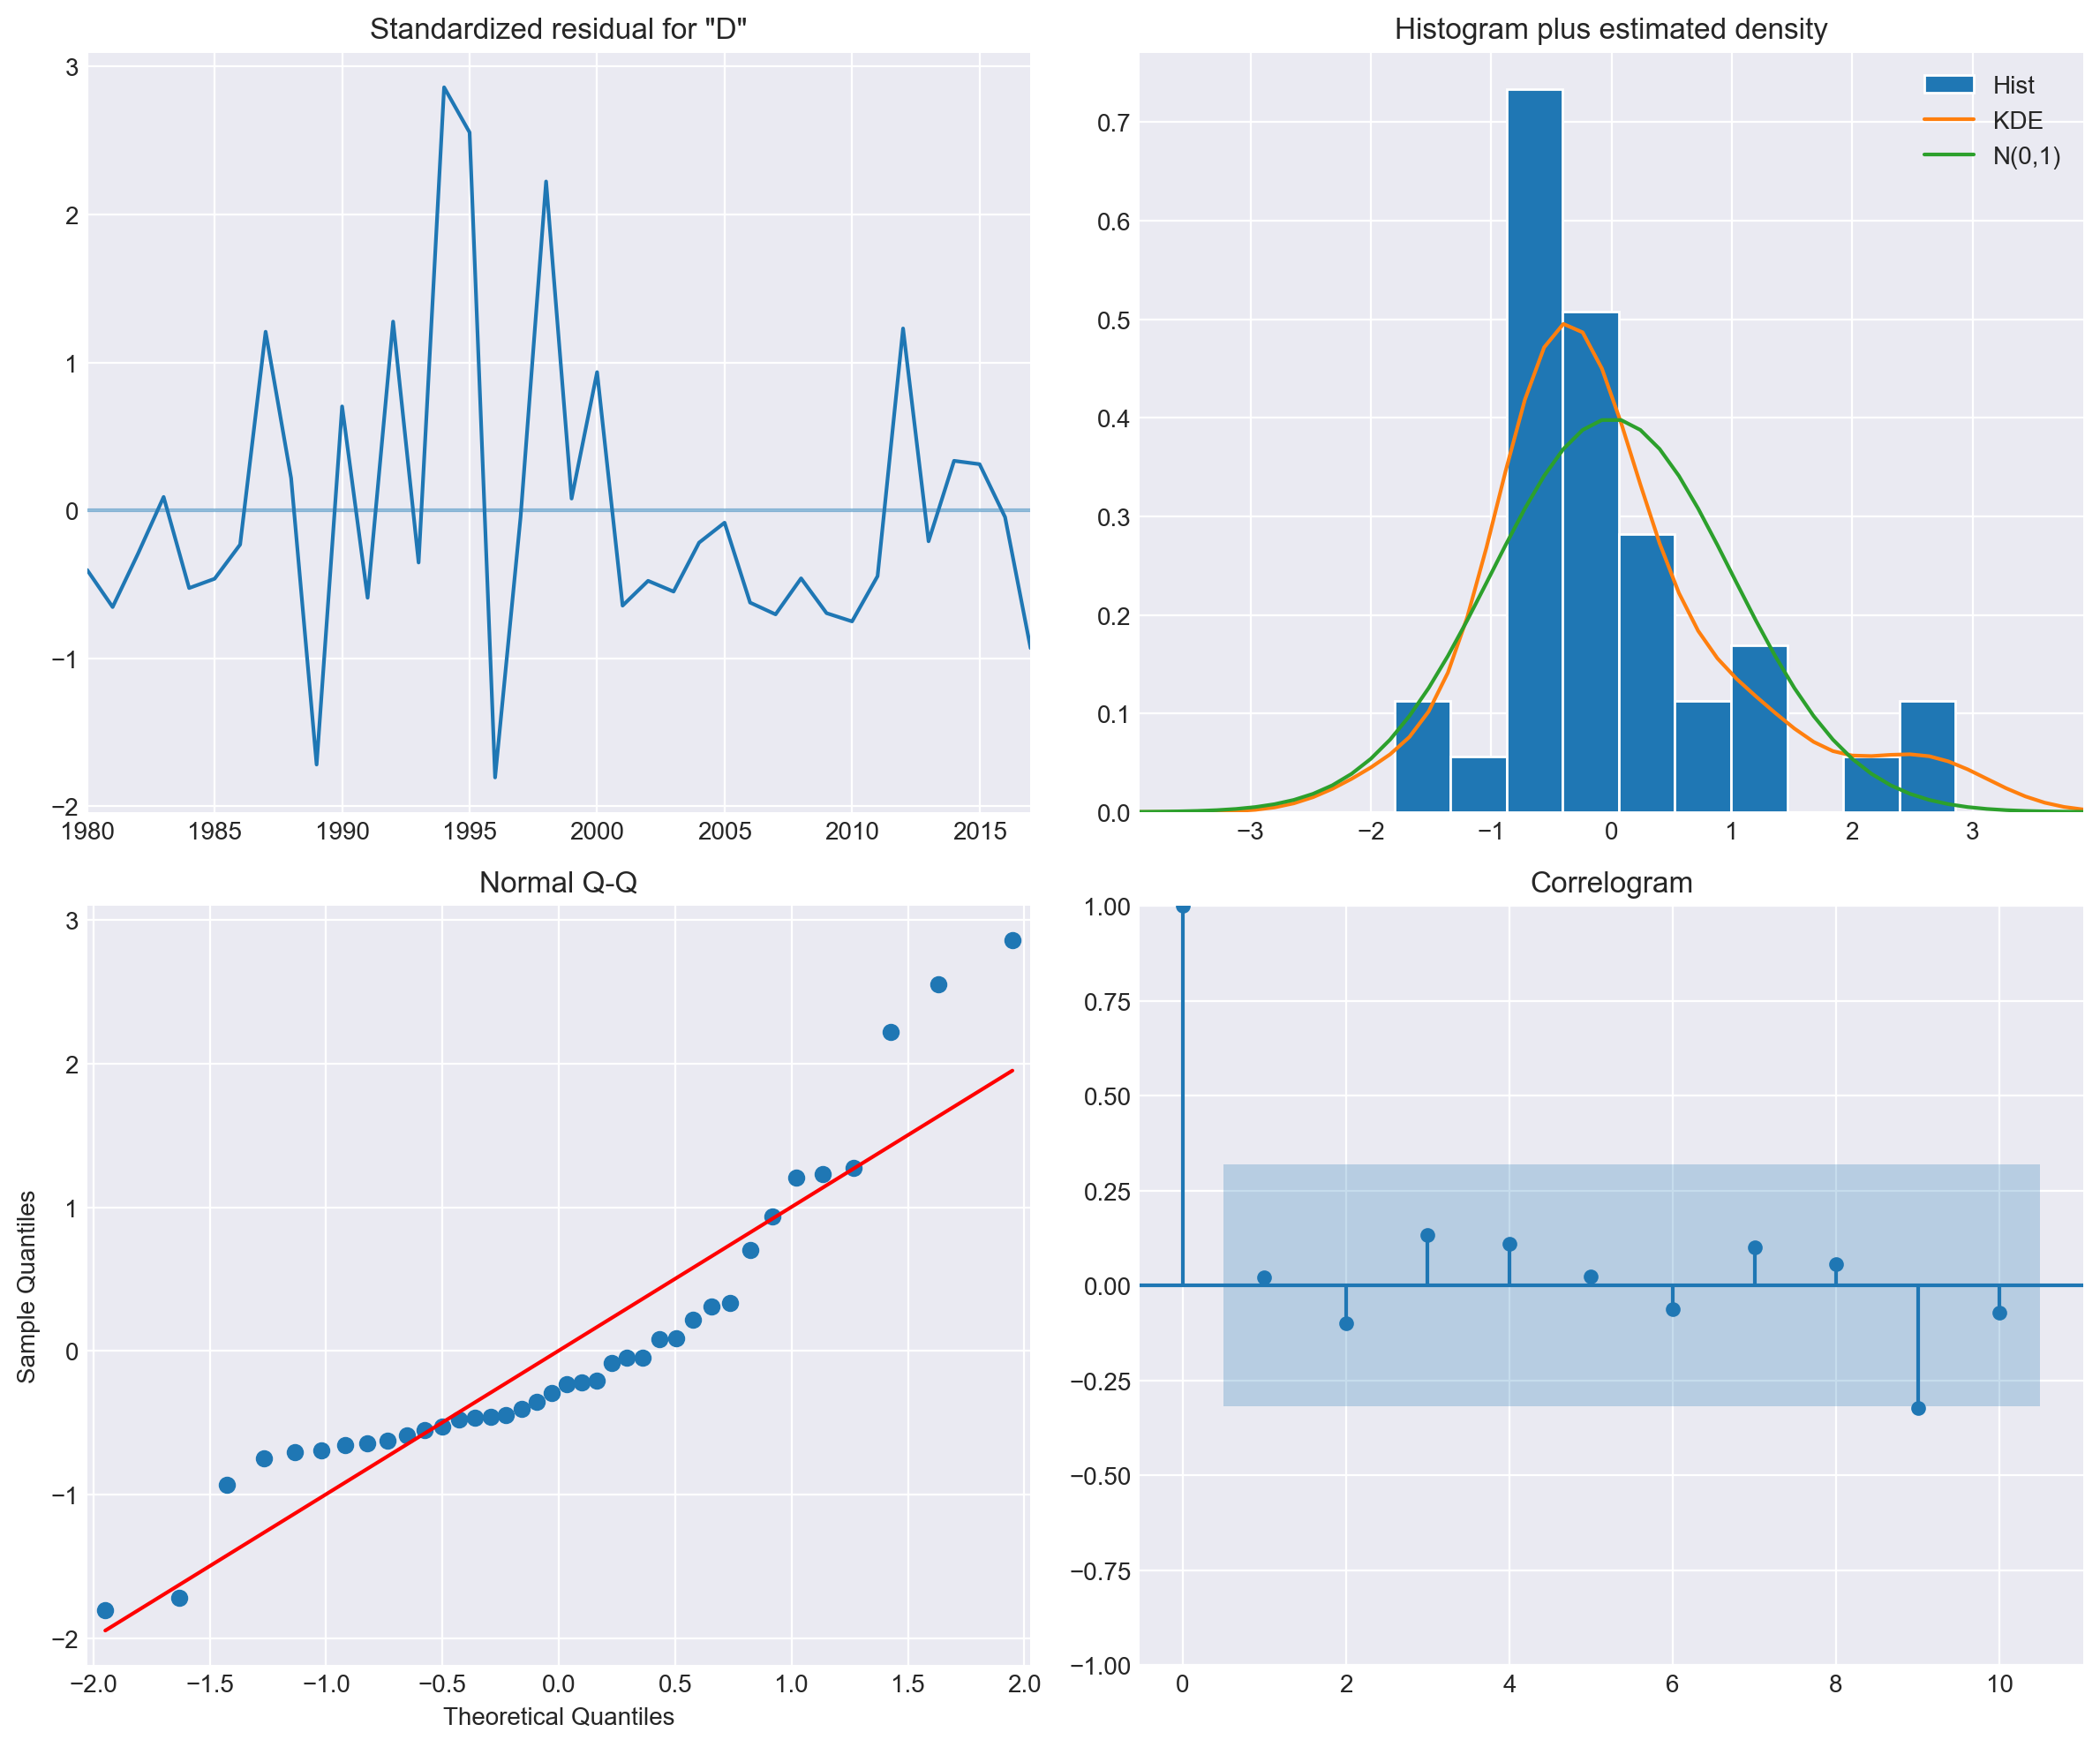

In [46]:
# ar(1) diagnostics
resid_1.plot_diagnostics(figsize=(12,10))
plt.show()

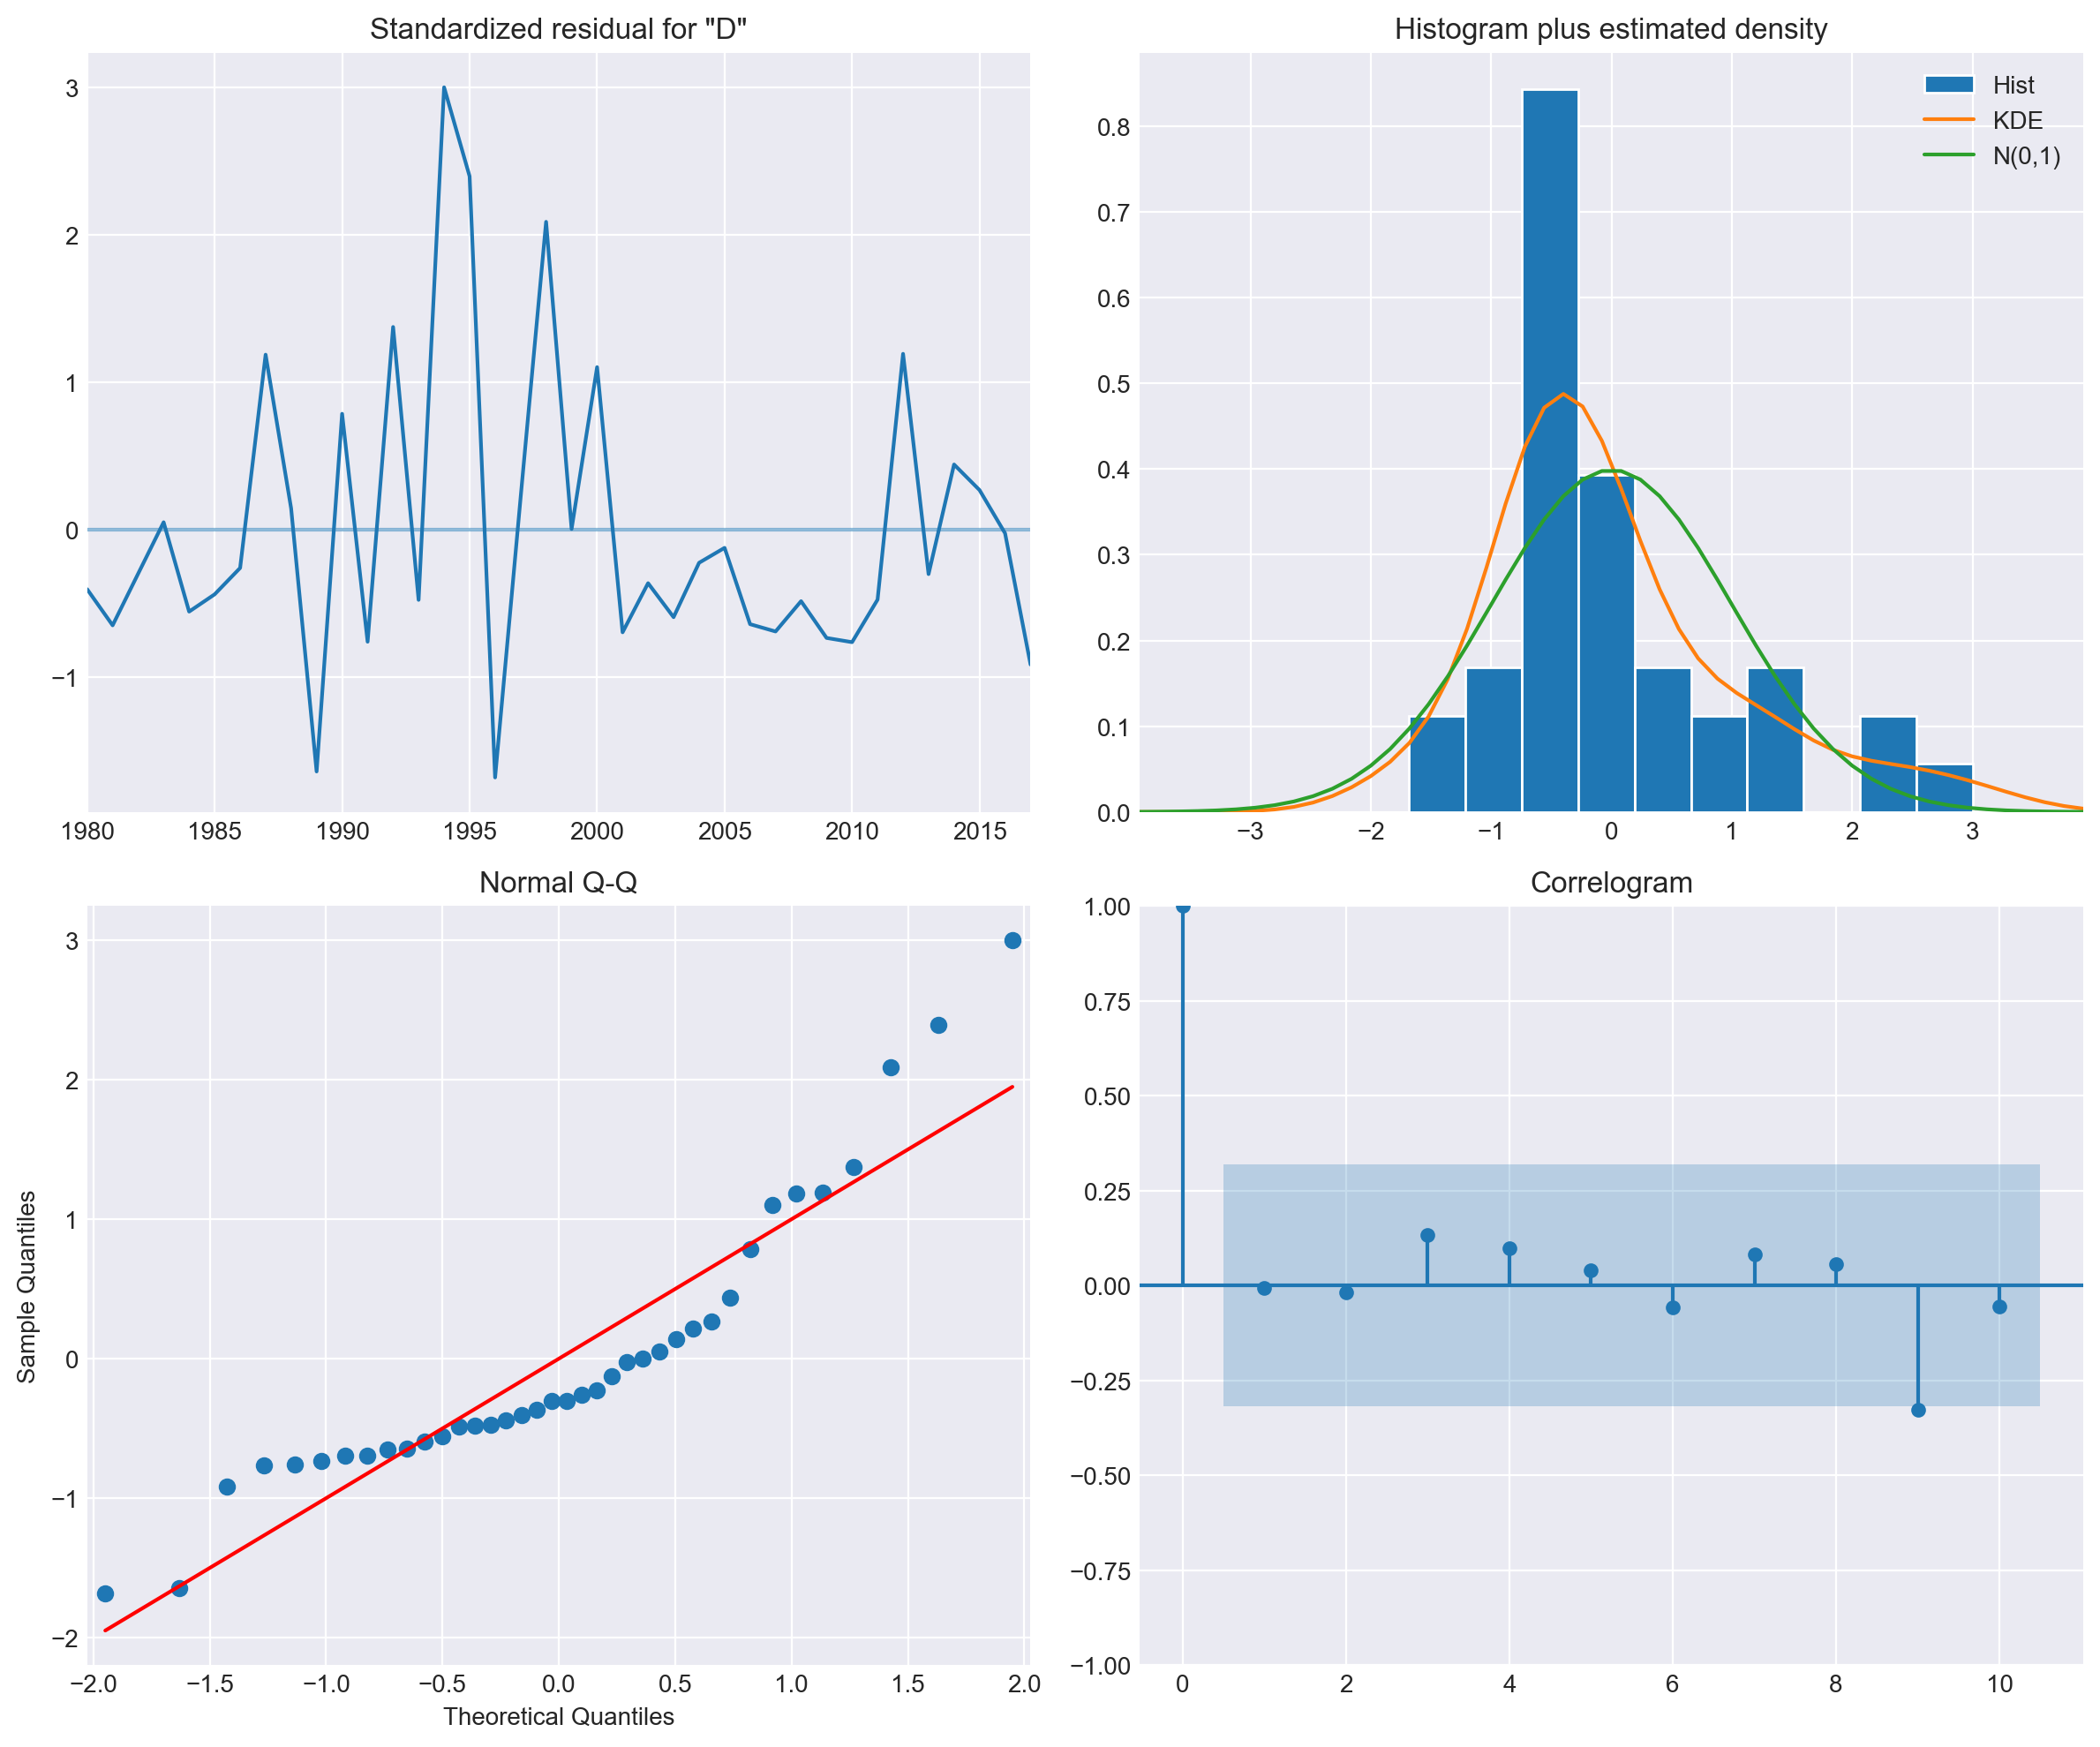

In [47]:
# ma(1) diagnostics
resid_01.plot_diagnostics(figsize=(12,10))
plt.show()

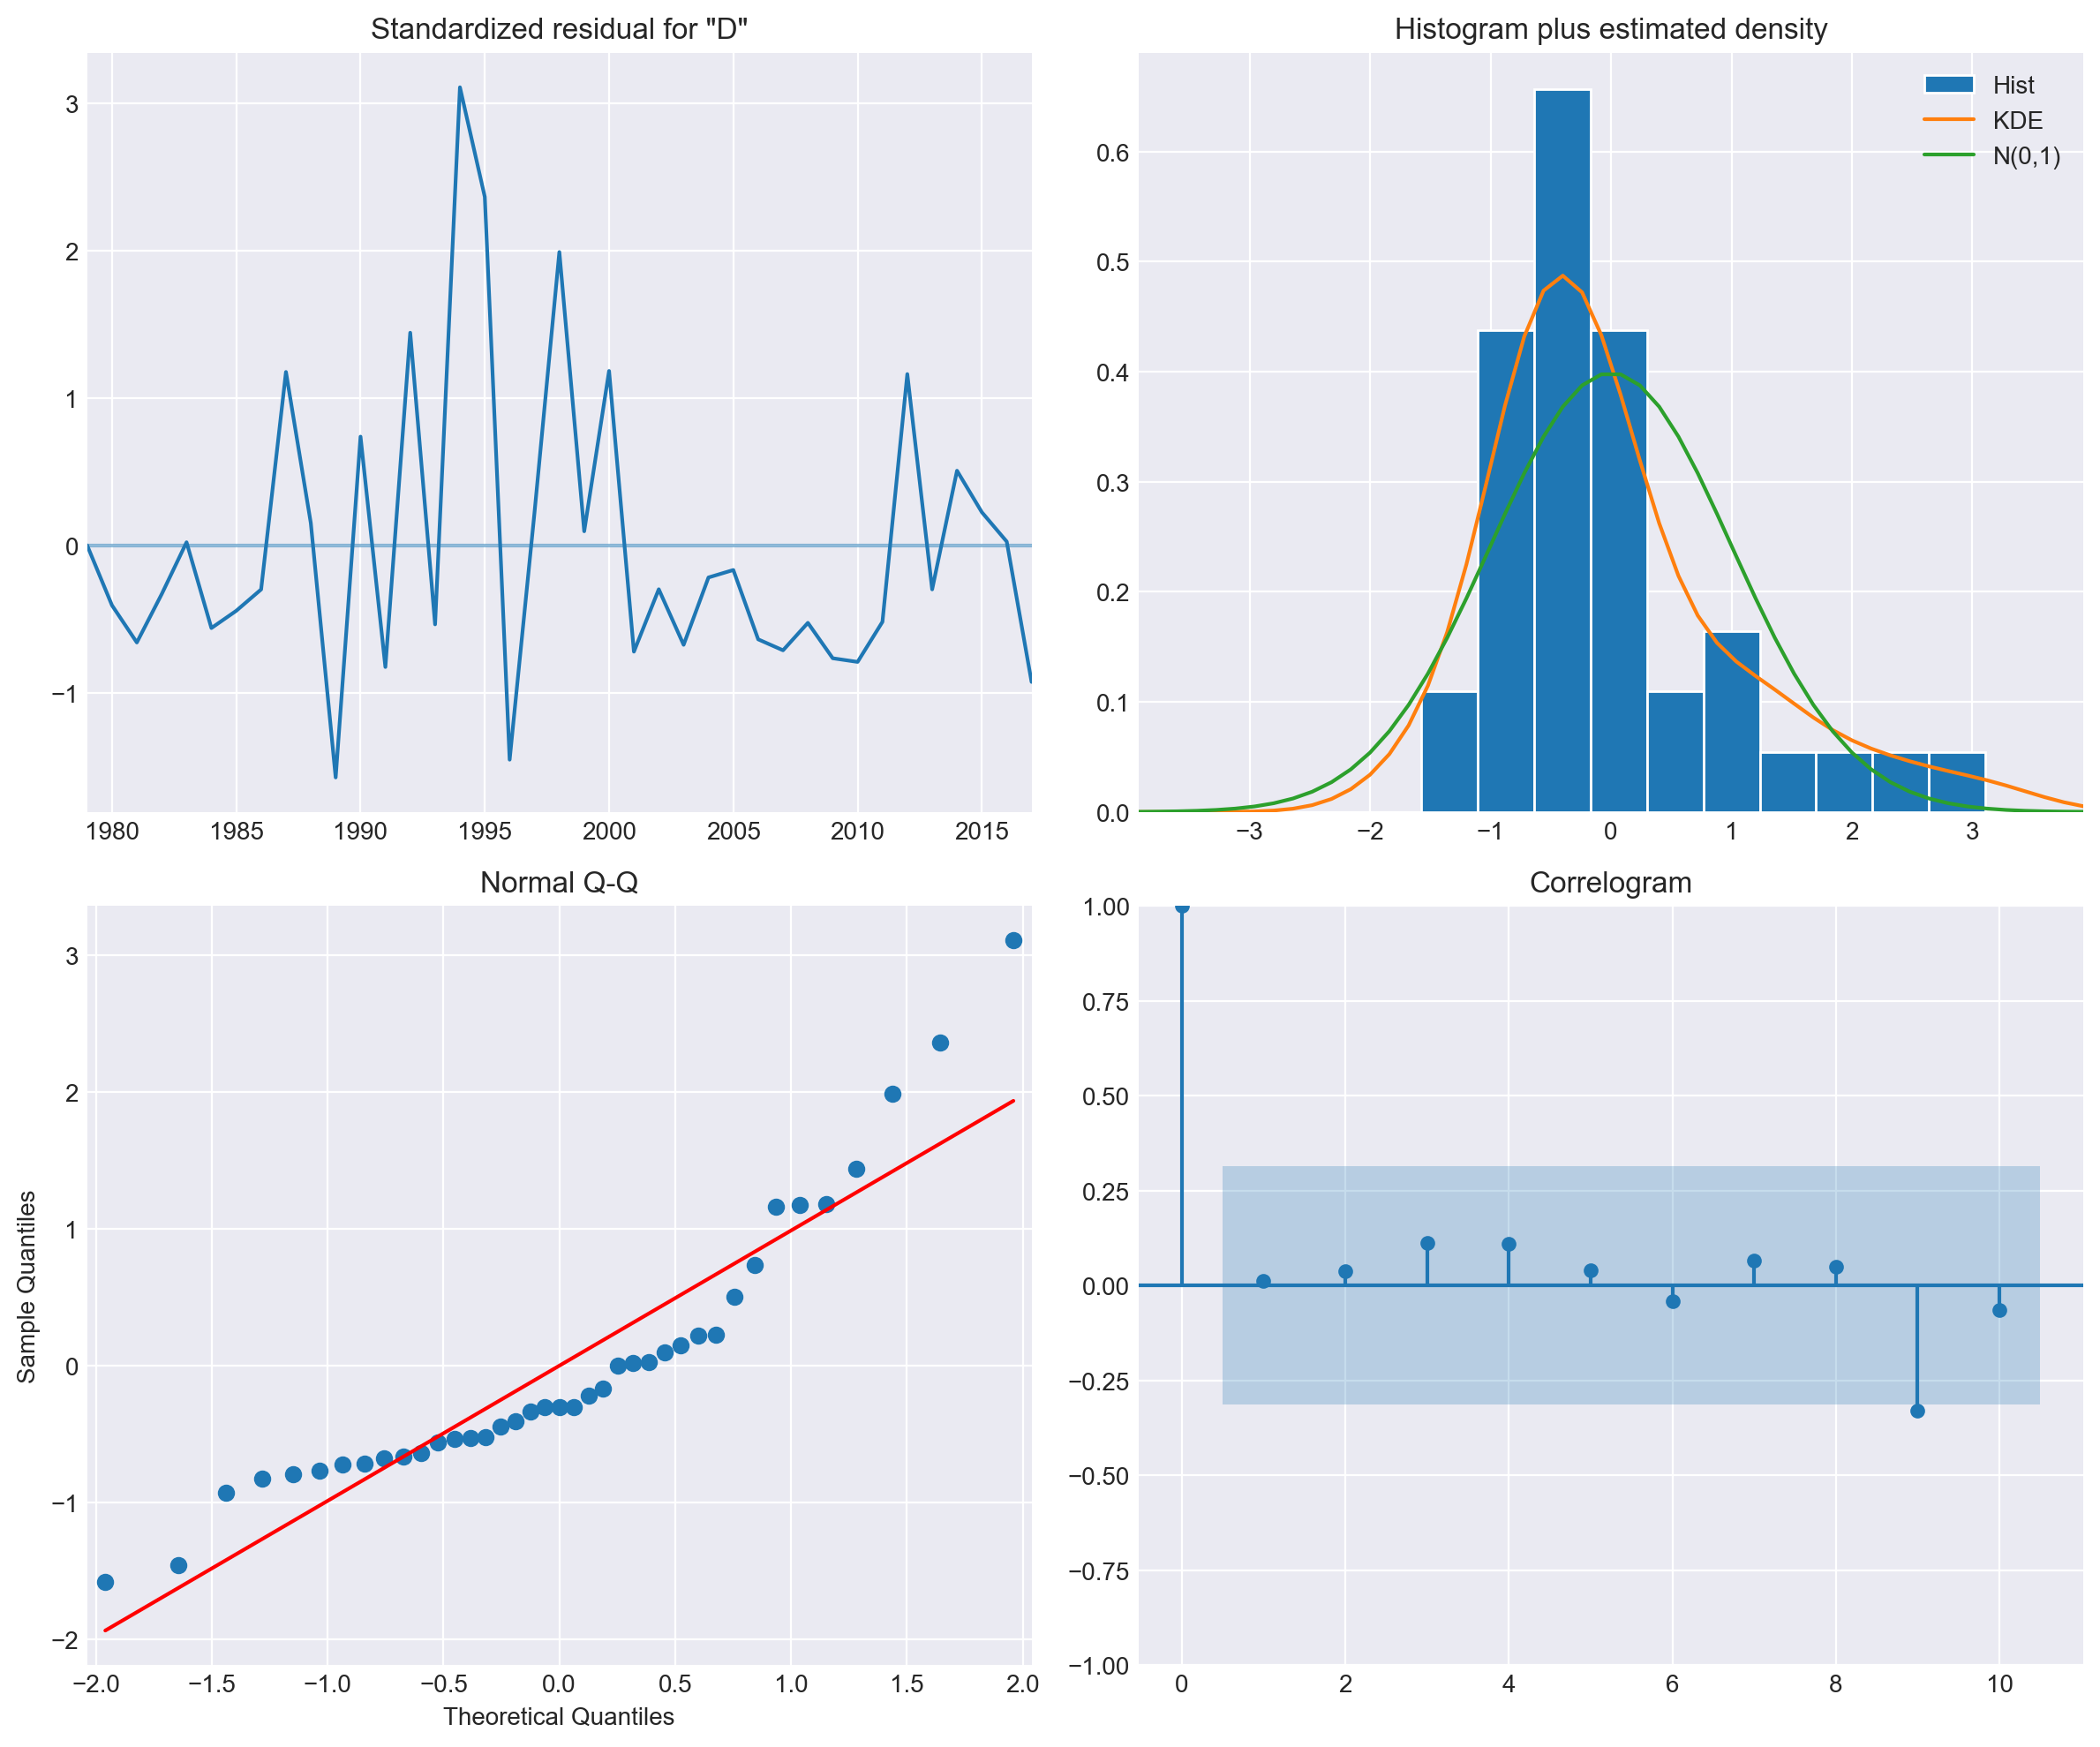

In [48]:
# arma(1,1) diagnostics

resid_11.plot_diagnostics(figsize=(12,10))
plt.show()

In [49]:
# dropping null values

cpi_data.dropna(inplace = True)

In [50]:
cpi_data.head()

,CPI,Diff
Year,,
1980-01-01,0.508253,0.126400
1981-01-01,0.553987,0.086162
1982-01-01,0.623294,0.117877
1983-01-01,0.739278,0.170656
1984-01-01,0.827444,0.112667


<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model forecasting </h3>

In [51]:
# splitting the data and fitting model and perfoming the forecasts

nforecasts = 1
forecasts = {}   

nobs = len(cpi_data.Diff)
n_init_training = int(nobs * 0.8)  

init_training_cpi = cpi_data.Diff.iloc[:n_init_training]  
mod = sm.tsa.arima.ARIMA(init_training_cpi, order=(0, 0, 1))  
res = mod.fit()

forecasts[init_training_cpi.index[-1]] = res.forecast(steps=nforecasts)

for t in range(n_init_training, nobs):
    
    updated_cpi = cpi_data.Diff.iloc[t:t+1]
    res = res.append(updated_cpi, refit=True)
    
    forecasts[updated_cpi.index[0]] = res.forecast(steps=nforecasts)

forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:6, :6])


            2009-01-01  2010-01-01  2011-01-01  2012-01-01  2013-01-01  \
2010-01-01    0.151574         NaN         NaN         NaN         NaN   
2011-01-01         NaN    0.146652         NaN         NaN         NaN   
2012-01-01         NaN         NaN    0.155449         NaN         NaN   
2013-01-01         NaN         NaN         NaN    0.221354         NaN   
2014-01-01         NaN         NaN         NaN         NaN    0.165342   
2015-01-01         NaN         NaN         NaN         NaN         NaN   

            2014-01-01  
2010-01-01         NaN  
2011-01-01         NaN  
2012-01-01         NaN  
2013-01-01         NaN  
2014-01-01         NaN  
2015-01-01    0.192657  


In [52]:
# To remove some null values and reindex

def flatten(column):
    return column.dropna().reset_index(drop=True) 

In [53]:
# Flattening the results
forecast_2 = forecasts.apply(lambda column: column).reindex(forecasts.index) 
flattened2 = forecast_2.apply(flatten)
flattened2.index = (flattened2.index + 1 ).rename('horizon') 
print(flattened2.iloc[:4, :6])

         2009-01-01  2010-01-01  2011-01-01  2012-01-01  2013-01-01  \
horizon                                                               
1          0.151574    0.146652    0.155449    0.221354    0.165342   

         2014-01-01  
horizon              
1          0.192657  


In [54]:
pivoted_forecasts=flattened2.T

pivoted_forecasts

horizon,1
2009-01-01,0.151574
2010-01-01,0.146652
2011-01-01,0.155449
2012-01-01,0.221354
2013-01-01,0.165342
2014-01-01,0.192657
2015-01-01,0.187802
2016-01-01,0.177337
2017-01-01,0.143044


In [55]:
cpi_forecast=pd.concat([cpi_data,pivoted_forecasts],axis=1)
cpi_forecast

,CPI,Diff,1
1980-01-01,0.508253,0.126400,NaN
1981-01-01,0.553987,0.086162,NaN
1982-01-01,0.623294,0.117877,NaN
1983-01-01,0.739278,0.170656,NaN
1984-01-01,0.827444,0.112667,NaN
1985-01-01,0.918911,0.104848,NaN
1986-01-01,1.046210,0.129740,NaN
1987-01-01,1.417730,0.303883,NaN
1988-01-01,1.791620,0.234063,NaN
1989-01-01,1.774170,-0.009788,NaN


In [56]:
cpi_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 1980-01-01 to 2017-01-01
Freq: AS-JAN
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPI     38 non-null     float64
 1   Diff    38 non-null     float64
 2   1       9 non-null      float64
dtypes: float64(3)
memory usage: 1.2 KB


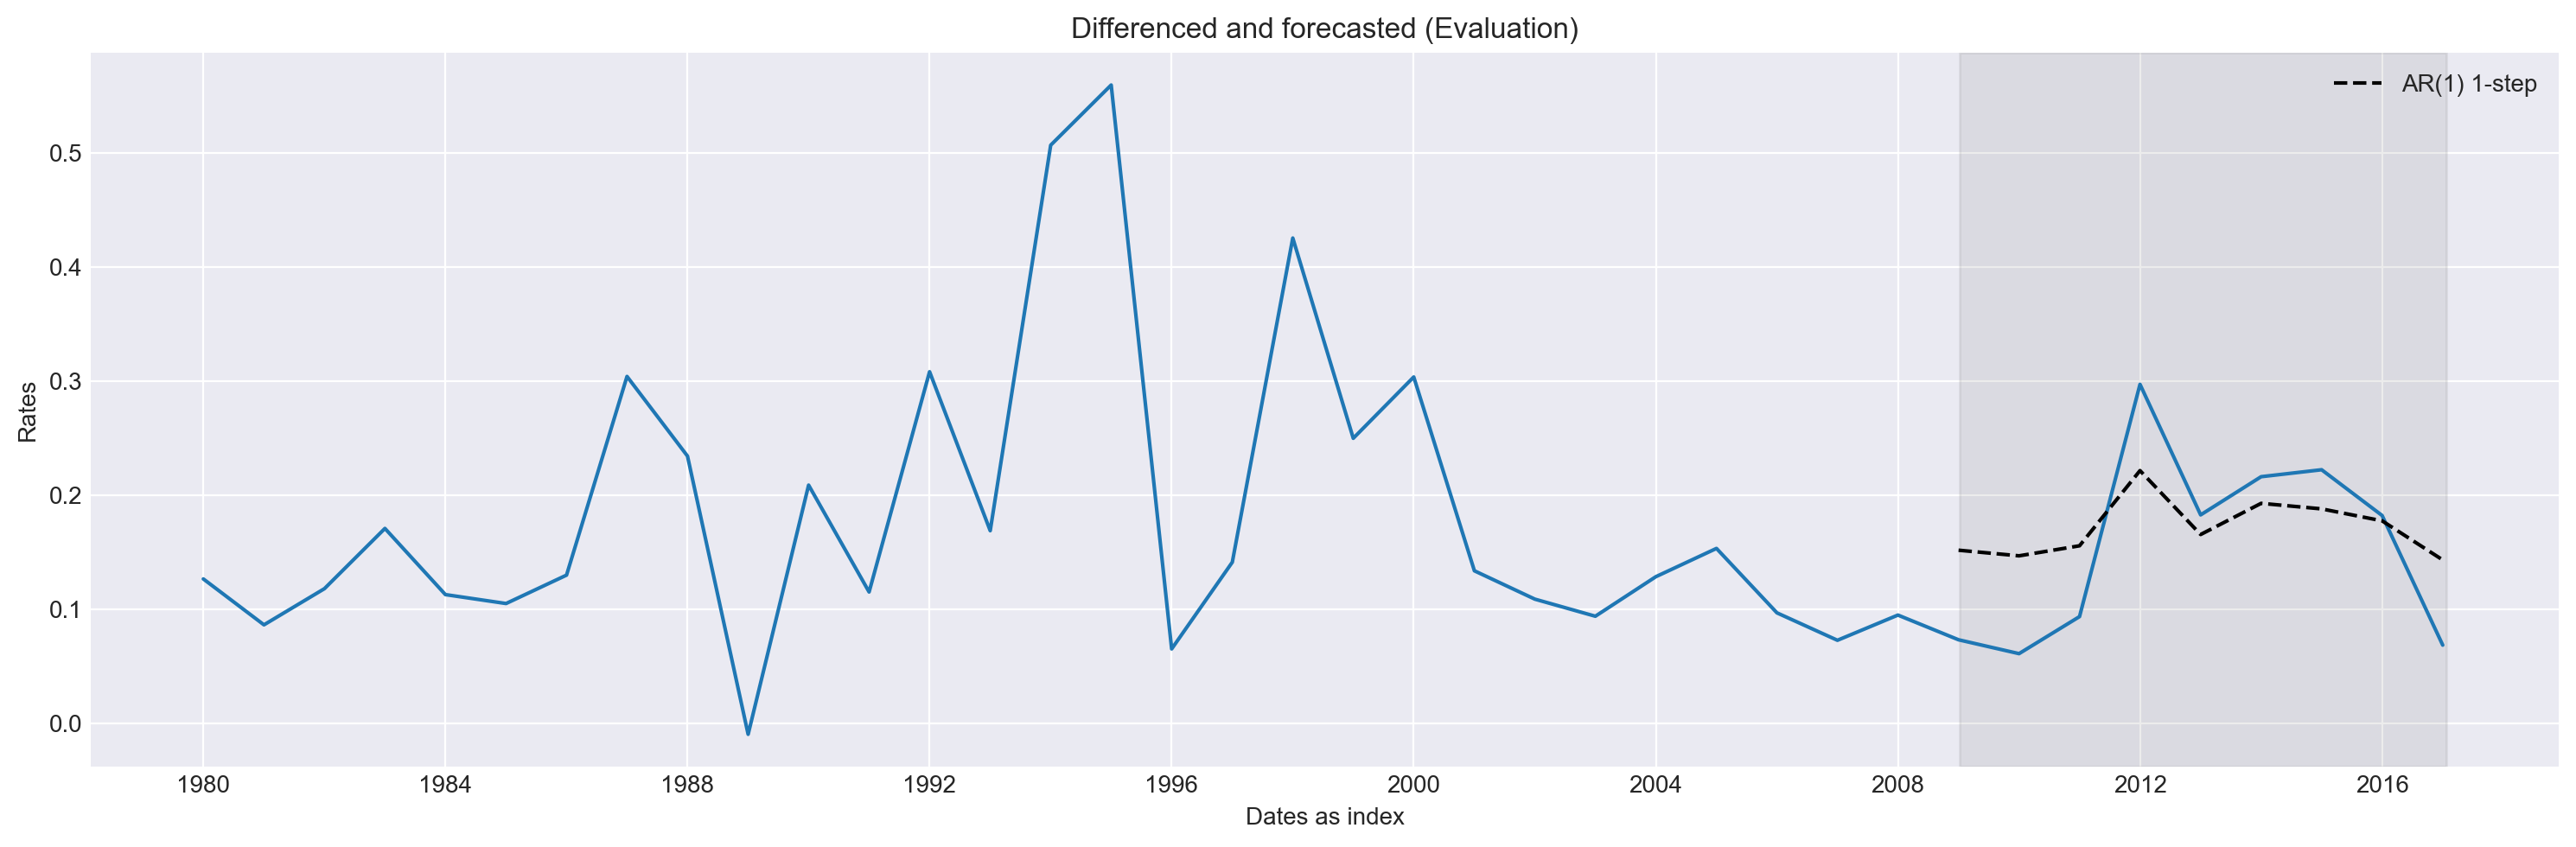

In [57]:
fig, ax4 = plt.subplots()
ax4.plot(cpi_forecast['Diff'])
ax4.plot(cpi_forecast[1], 'k--', label='AR(1) 1-step')
ax4.set_xlabel('Dates as index')
ax4.set_ylabel('Rates')
ax4.set_title('Differenced and forecasted (Evaluation)')
ax4.axvspan(14250, 17190, color='#808080', alpha=0.15)
ax4.legend(loc=1)
plt.show()

In [58]:
# forecasts from test data
pivoted_forecasts

horizon,1
2009-01-01,0.151574
2010-01-01,0.146652
2011-01-01,0.155449
2012-01-01,0.221354
2013-01-01,0.165342
2014-01-01,0.192657
2015-01-01,0.187802
2016-01-01,0.177337
2017-01-01,0.143044


In [59]:
# out-of-sample forecasting

res.forecast(12)

2018-01-01    0.143044
2019-01-01    0.175346
2020-01-01    0.175346
2021-01-01    0.175346
2022-01-01    0.175346
2023-01-01    0.175346
2024-01-01    0.175346
2025-01-01    0.175346
2026-01-01    0.175346
2027-01-01    0.175346
2028-01-01    0.175346
2029-01-01    0.175346
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [60]:
# method to transform forecast values to original scale
def to_original_scale(initial_value,column):
    
    original_data = np.r_[initial_value,column].cumsum()
    return np.exp(original_data)

In [61]:
cpi_data.head()

,CPI,Diff
Year,,
1980-01-01,0.508253,0.126400
1981-01-01,0.553987,0.086162
1982-01-01,0.623294,0.117877
1983-01-01,0.739278,0.170656
1984-01-01,0.827444,0.112667


In [62]:
# differenced data to original scale
to_original_scale(-0.803176,cpi_forecast.Diff)

array([  0.44790416,   0.50825318,   0.5539872 ,   0.62329422,
         0.73927826,   0.82744429,   0.91891133,   1.04621037,
         1.4177305 ,   1.79162064,   1.77417063,   2.18577078,
         2.45206087,   3.33656119,   3.9495814 ,   6.55490233,
        11.46780407,  12.23840435,  14.09280501,  21.56070766,
        27.67550983,  37.48591332,  42.84101522,  47.75931697,
        52.45111863,  59.63442118,  69.50332469,  76.5572272 ,
        82.32412925,  90.50323215,  97.36293459, 103.47803676,
       113.60604036, 152.88805431, 183.50506519, 227.75008091,
       284.39310103, 341.1681212 , 365.31312978])

In [63]:
cpi_forecast

,CPI,Diff,1
1980-01-01,0.508253,0.126400,NaN
1981-01-01,0.553987,0.086162,NaN
1982-01-01,0.623294,0.117877,NaN
1983-01-01,0.739278,0.170656,NaN
1984-01-01,0.827444,0.112667,NaN
1985-01-01,0.918911,0.104848,NaN
1986-01-01,1.046210,0.129740,NaN
1987-01-01,1.417730,0.303883,NaN
1988-01-01,1.791620,0.234063,NaN
1989-01-01,1.774170,-0.009788,NaN


In [64]:
# test data forecasts to original scale

forecasts_to_original = pd.Series(to_original_scale(4.505385,pivoted_forecasts[1]))
forecasts_to_original

0     90.503181
1    105.315375
2    121.950010
3    142.459833
4    177.756485
5    209.716454
6    254.274329
7    306.806140
8    366.336851
9    422.672143
dtype: float64

In [65]:
# out-of-sample forecasts to original scale

forecasts_to_original2 = pd.Series(to_original_scale(5.900755,res.forecast(12)))
forecasts_to_original2 = forecasts_to_original2[1::]
forecasts_to_original2.index = res.forecast(12).index
forecasts_to_original2

2018-01-01     421.491047
2019-01-01     502.273135
2020-01-01     598.537749
2021-01-01     713.252237
2022-01-01     849.952662
2023-01-01    1012.852803
2024-01-01    1206.974044
2025-01-01    1438.300153
2026-01-01    1713.961739
2027-01-01    2042.456045
2028-01-01    2433.908880
2029-01-01    2900.386743
Freq: AS-JAN, dtype: float64

In [66]:
forecasts_to_original2.to_csv('cpi_forecast.csv')

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model Evaluation </h3>

In [67]:
# transforming data for evaluation

forecast_errors = forecasts.apply(lambda column: cpi_forecast.Diff - column).reindex(forecasts.index)
flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:4, :5])

         2009-01-01  2010-01-01  2011-01-01  2012-01-01  2013-01-01
horizon                                                            
1         -0.090661   -0.053274     0.14152   -0.038818    0.050665


In [68]:
# root mean square error (RMSE)
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    0.077405
dtype: float64


In [69]:
# Compute the mean absolute error (MAE)
mae = (abs(flattened).mean(axis=1))

print(mae)

horizon
1    0.064891
dtype: float64
